In [1]:
import pandas as pd
import numpy as np

In [9]:
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt

In [14]:
# summed up code
#to load .xlsx file into a pd dataframe object namely bet
bet = pd.read_csv("ipl.csv")
# to load another .csv file with index as match no and winner
ipl = pd.read_csv("winteam.csv")
bet = pd.merge(bet,ipl,how='outer',left_on='Match Number',right_on='Match Number')
# based on true values assigned to match no. award all the correct emails a score of 18 / no. of correct responses equally
bet.set_index('Match Number', inplace=True)
bet.loc[:,'No. of winners'] = bet[bet['Choose the team which you believe will win']==bet['Winner']].groupby('Match Number').count().loc[:,'Winner']
bet.reset_index(inplace= True)
bet.fillna(0, inplace=True)
bet = bet[bet['No. of winners']!=0]
bet.loc[:,'Credit'] = 18/bet[bet['Choose the team which you believe will win']==bet['Winner']].loc[:,'No. of winners']
fin = bet.groupby('Email Address')['Credit'].sum()


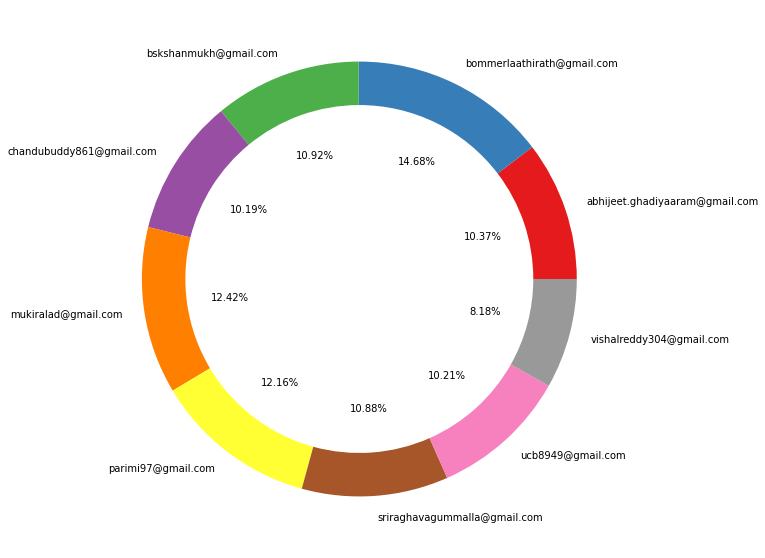

In [115]:
fig = plt.gcf();
fig.set_size_inches(10,10)
cmap = plt.get_cmap('Set1')
my_colors = cmap(np.arange(10))
plt.pie(fin,
        autopct="%.2f%%",
        labels = fin.index,
        wedgeprops=dict(width=0.2),
       colors = my_colors);
plt.show()

In [39]:
bet.columns = ['Match Number', 'Timestamp', 'Email Address',
       'Prediction', 'Winner',
       'No. of winners', 'Credit']

In [43]:
bet.fillna(0, inplace =True)

In [51]:
success= bet[bet['Prediction']==bet['Winner']].groupby('Email Address')['Prediction'].count()

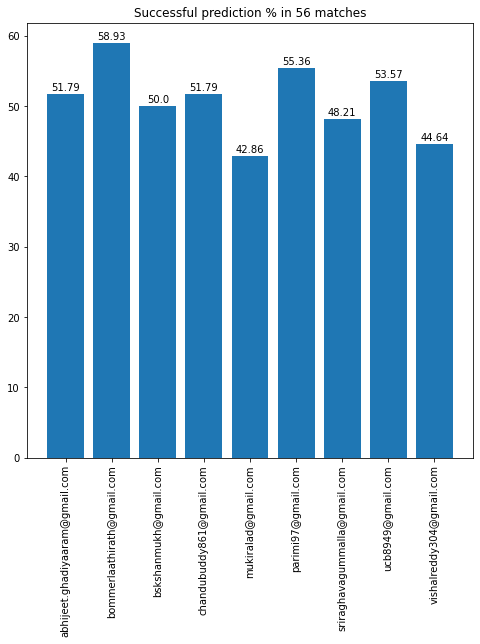

In [104]:
fig = plt.gcf();
fig.set_size_inches(8,8)
plt.bar(success.index,success.values/56*100)
plt.xticks(rotation = 90)
plt.title('Successful prediction % in 56 matches')
for i in success.index:
    y = success[i]/56*100
    plt.text(i,y+0.5, str(round(y,2)), ha ='center')

In [112]:
luck = fin/success
luck_normalized = (luck - np.mean(luck))/np.std(luck)


In [113]:
luck_normalized

Email Address
abhijeet.ghadiyaaram@gmail.com   -0.604173
bommerlaathirath@gmail.com        0.949321
bskshanmukh@gmail.com            -0.024407
chandubuddy861@gmail.com         -0.715807
mukiralad@gmail.com               2.241443
parimi97@gmail.com                0.011958
sriraghavagummalla@gmail.com      0.204337
ucb8949@gmail.com                -0.914046
vishalreddy304@gmail.com         -1.148628
dtype: float64

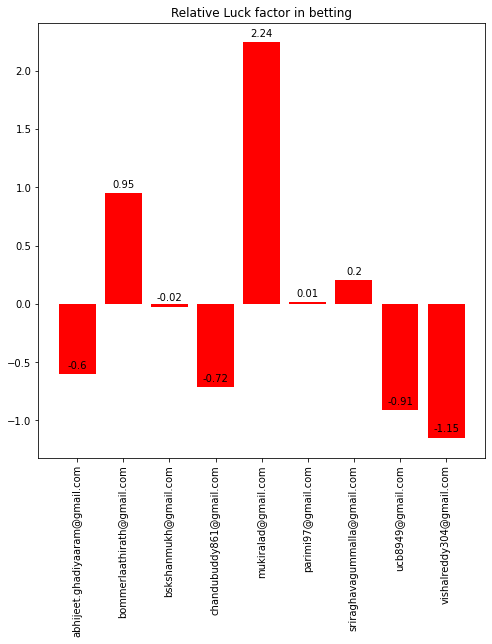

In [131]:
fig = plt.gcf();
fig.set_size_inches(8,8)
cmap = plt.get_cmap('Set1')
my_colors = cmap(np.arange(3))
plt.bar(luck_normalized.index,luck_normalized.values,color = 'red')
plt.xticks(rotation = 90)
plt.title('Relative Luck factor in betting')
for i in success.index:
    y = luck_normalized[i]
    plt.text(i,y+0.05, str(round(y,2)), ha ='center')

In [151]:
bet.groupby('Email Address')

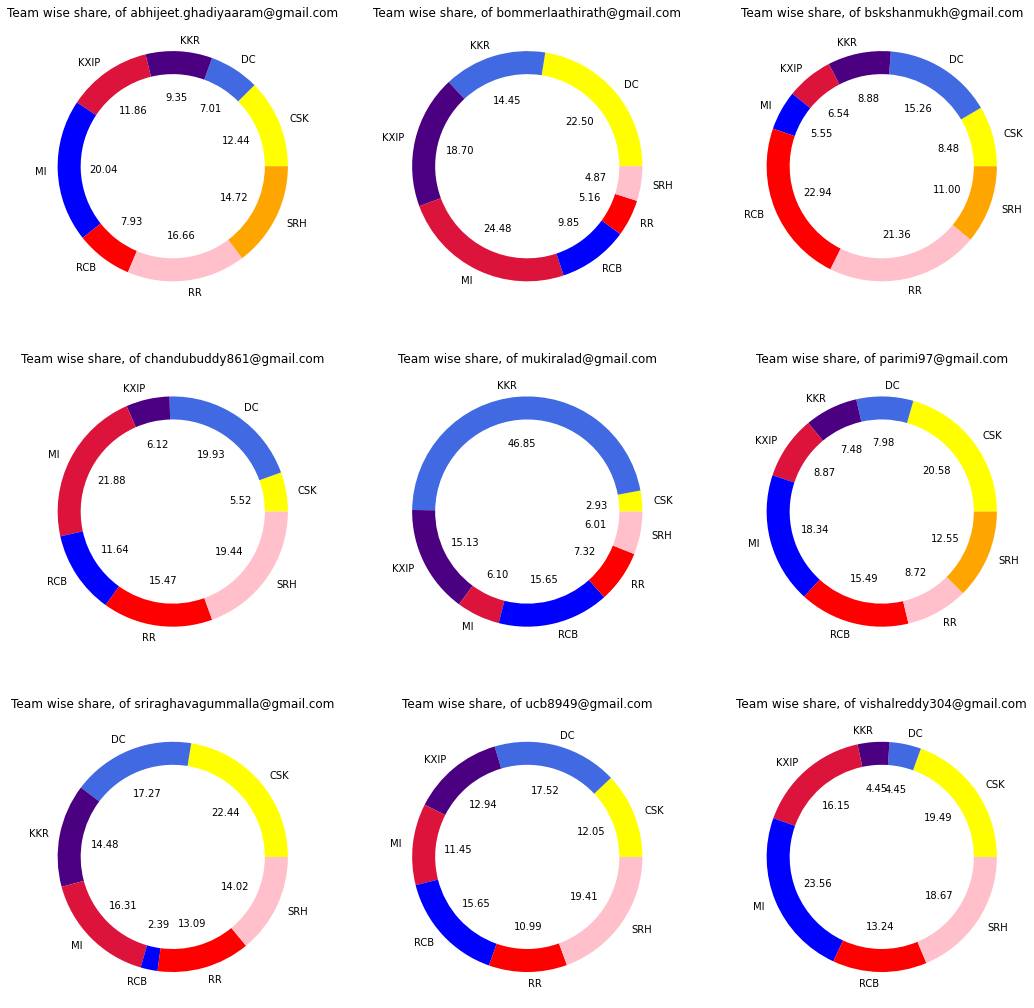

In [232]:
i=0
fig,axs =plt.subplots(3,3,figsize=(18,18))
axs = axs.ravel()
for item in bet.groupby('Email Address'):
    temp = item[1]
    gainer = temp[temp['Prediction']==temp['Winner']]
    f = gainer.groupby('Winner')['Credit'].sum()
    cmap = plt.get_cmap('Set1')
    my_colors = cmap(np.arange(10))
    axs[i].pie(f, autopct="%.2f", labels = f.index, wedgeprops=dict(width=0.2), colors = ['yellow','royalblue','indigo','crimson','blue','red','pink','orange'])
    axs[i].set_title('Team wise share, of %s'% item[0])
    i +=1
plt.show()

In [176]:
for item in bet.groupby('Email Address'):
    temp = item[1]
    gainer = temp[temp['Prediction']==temp['Winner']]
    f = gainer.groupby('Winner')['Credit'].sum()
    lol = f[f.values == f.max()]
    print(item[0],'\n', lol.index[0],lol.values[0])

abhijeet.ghadiyaaram@gmail.com 
 MI 20.57142857142857
bommerlaathirath@gmail.com 
 MI 35.57142857142857
bskshanmukh@gmail.com 
 RCB 24.814285714285717
chandubuddy861@gmail.com 
 MI 22.07142857142857
mukiralad@gmail.com 
 KKR 57.6
parimi97@gmail.com 
 CSK 24.771428571428572
sriraghavagummalla@gmail.com 
 CSK 24.17142857142857
ucb8949@gmail.com 
 SRH 19.607142857142858
vishalreddy304@gmail.com 
 MI 19.07142857142857
